In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
path = "50_Startups.csv"
df  = pd.read_csv(path)

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


So, we should plot our X[every feature] and y[output] and see if their is a linear relation then we can apply linear regression otherwise we cant.

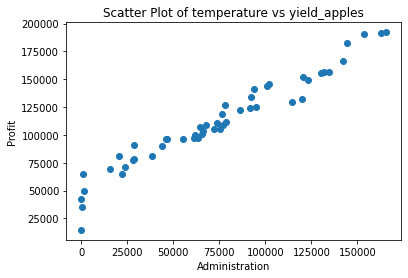

In [6]:
plt.scatter(x =df["R&D Spend"], y = df["Profit"])
plt.xlabel("Administration")
plt.ylabel("Profit")
plt.title("Scatter Plot of temperature vs yield_apples")
plt.show()

So, Our data_set has state which is a categorical feature . So we will remove it. But we can do one hot encoding (we will do it later in second part of notebook) 

In [9]:
X = df.drop(["State", "Profit"], axis = "columns")
y = df["Profit"]
print("shape of X = ", X.shape)
print("shape of y = ", y.shape)
X

shape of X =  (50, 3)
shape of y =  (50,)


,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=51)
print("shape of X_train = ", X_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (40, 3)
shape of y_train =  (40,)
shape of X_test =  (10, 3)
shape of y_test =  (10,)


In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [12]:
lr.fit(X_train,y_train)

LinearRegression()

In [14]:
y_test

4     166187.94
48     35673.41
47     42559.73
15    129917.04
0     192261.83
17    125370.37
29    101004.64
31     97483.56
19    122776.86
2     191050.39
Name: Profit, dtype: float64

In [20]:
y_pred  = lr.predict(X_test)
y_pred = np.round_(y_pred, decimals = 2)
y_pred

array([173368.39,  53222.44,  47621.93, 146849.38, 191661.48, 129803.86,
       102010.94,  98003.82, 116563.68, 182848.08])

In [21]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["R&D Spend", "Administration", "Marketing Spend", "Actual Profit", "Profit Predicted"])

,R&D Spend,Administration,Marketing Spend,Actual Profit,Profit Predicted
0,142107.34,91391.77,366168.42,166187.94,173368.39
1,542.05,51743.15,0.00,35673.41,53222.44
2,0.00,135426.92,0.00,42559.73,47621.93
3,114523.61,122616.84,261776.23,129917.04,146849.38
4,165349.20,136897.80,471784.10,192261.83,191661.48
5,94657.16,145077.58,282574.31,125370.37,129803.86
6,65605.48,153032.06,107138.38,101004.64,102010.94
7,61136.38,152701.92,88218.23,97483.56,98003.82
8,86419.70,153514.11,0.00,122776.86,116563.68
9,153441.51,101145.55,407934.54,191050.39,182848.08


In [22]:
lr.score(X_test,y_test)

0.9698613746177682